###01.Download data and Split data into Train, Validation, Test set's

Dataset used: http://vision.stanford.edu/aditya86/ImageNetDogs/

In [ ]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2024-01-31 11:56:58--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  9.11MB/s    in 41s     

2024-01-31 11:57:39 (18.7 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [ ]:
#unzip tar file
!tar -xf images.tar

In [ ]:
#Remove tar file after unzip
!rm -rf images.tar

In [ ]:
!pip install split-folders

In [ ]:
#splitting the data for Train = 75%, val=20%, Test=5%
import splitfolders
Images_path = '/content/Images'
Images_splitted = "Standford_dog_data"
splitfolders.ratio(Images_path, output=Images_splitted,
        seed=42, ratio=(0.75, 0.20, 0.05), group_prefix=None, move=False)

Copying files: 20580 files [00:04, 4396.25 files/s]


In [ ]:
#count images splitwise
import glob
Total_train_data = glob.glob(Images_splitted+'/train/*/*.jpg')
Total_val_data = glob.glob(Images_splitted+'/val/*/*.jpg')
Total_test_data = glob.glob(Images_splitted+'/test/*/*.jpg')
print(f'Total images for Training {len(Total_train_data)},\nTotal images for Validation : {len(Total_val_data)},\nTotal images for Testing : {len(Total_test_data)} ')

Total images for Training 15394,
Total images for Validation : 4072,
Total images for Testing : 1114 


In [ ]:
#check and count data of each classwise
import os
Standford_dog_data = '/content/Standford_dog_data'
for dir_path, dir_name, file_name in os.walk(Standford_dog_data):
    #print(f_p.split('\\'))
    print(dir_path.split('Standford_dog_data')[-1], len(file_name))

 0
/val 0
/val/n02106550-Rottweiler 30
/val/n02092002-Scottish_deerhound 46
/val/n02091467-Norwegian_elkhound 39
/val/n02098413-Lhasa 37
/val/n02091244-Ibizan_hound 37
/val/n02107683-Bernese_mountain_dog 43
/val/n02095889-Sealyham_terrier 40
/val/n02099849-Chesapeake_Bay_retriever 33
/val/n02111500-Great_Pyrenees 42
/val/n02101556-clumber 30
/val/n02110958-pug 40
/val/n02105412-kelpie 30
/val/n02110806-basenji 41
/val/n02096177-cairn 39
/val/n02087394-Rhodesian_ridgeback 34
/val/n02108000-EntleBucher 40
/val/n02105251-briard 30
/val/n02085936-Maltese_dog 50
/val/n02093428-American_Staffordshire_terrier 32
/val/n02109961-Eskimo_dog 30
/val/n02100877-Irish_setter 31
/val/n02086646-Blenheim_spaniel 37
/val/n02088466-bloodhound 37
/val/n02099712-Labrador_retriever 34
/val/n02088238-basset 35
/val/n02101388-Brittany_spaniel 30
/val/n02106166-Border_collie 30
/val/n02107574-Greater_Swiss_Mountain_dog 33
/val/n02112706-Brabancon_griffon 30
/val/n02113712-miniature_poodle 31
/val/n02102480-Sus

Class names: n02115641-dingo
Image height 427, Image width 361


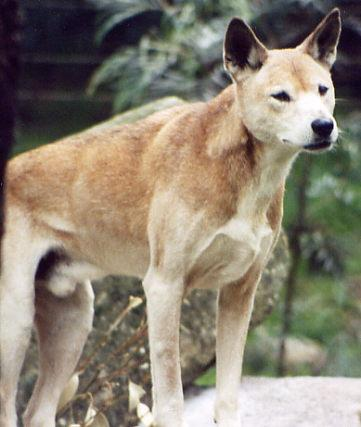

In [ ]:
#check an image size
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

Standford_dog_data = '/content/Standford_dog_data'

global_path = glob.glob(Standford_dog_data+'/train/*/*.jpg')

image = random.choice(global_path)
#print(image.split('/'))
class_name =image.split('/')[-2]
img = Image.open(image)
print(f'Class names: {class_name}')
print(f'Image height {img.height}, Image width {img.width}')
img


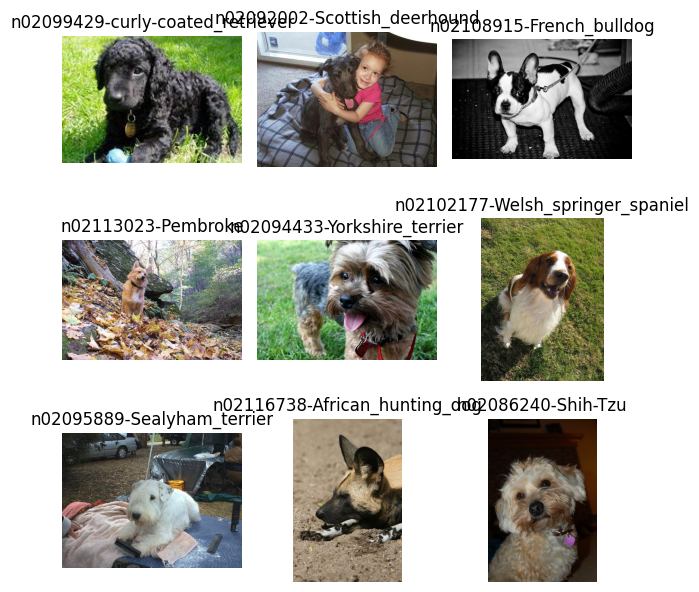

In [ ]:
#plot some random images in dataset
import os
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

Standford_dog_data = '/content/Standford_dog_data'

global_path = glob.glob(Standford_dog_data+'/*/*/*.jpg')

random_paths = random.choices(global_path, k=9)

# Create a new figure
plt.figure(figsize=(6, 6))

# Plot the images
for i, image_file in enumerate(random_paths[:9]):
    #print(image_file)

    image = Image.open(image_file)

    # Add subplot with 3 rows, 3 columns, and i+1 index
    plt.subplot(3, 3, i + 1)

    # Plot the image
    plt.imshow(image)
    plt.title(image_file.split('/')[-2])  # Set the title as the file name
    plt.axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### 02.Importing MobilenetV3small pretained model with same weights and transforms.

In [ ]:
import torch
import torchvision
from torchvision.datasets import ImageFolder

In [ ]:
from torchvision.models import MobileNet_V3_Small_Weights, mobilenet_v3_small
mobilenet_v3s_weights = MobileNet_V3_Small_Weights.DEFAULT
mobilenet_v3s_transforms = mobilenet_v3s_weights.transforms()
mobilenet_v3s_transforms
from torchvision import models

from torchvision.models import MobileNet_V3_Small_Weights, mobilenet_v3_small

mobilenet_v3s_weights = MobileNet_V3_Small_Weights.DEFAULT
print(mobilenet_v3s_weights)

mobilenet_v3s_transforms = mobilenet_v3s_weights.transforms()
print(mobilenet_v3s_transforms)
mobilenet_v3s_original = mobilenet_v3_small(weights=mobilenet_v3s_transforms)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


MobileNet_V3_Small_Weights.IMAGENET1K_V1
ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


100%|██████████| 9.83M/9.83M [00:00<00:00, 88.9MB/s]


In [ ]:
#checking model size
param_size = 0
for param in mobilenet_v3s_original.parameters():
    param_size += param.nelement() * param.element_size()

buffer_size = 0
for buffer in mobilenet_v3s_original.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('Pre trained Mobilenetv3s size: {:.3f}MB'.format(size_all_mb))


Pre trained Mobilenetv3s size: 9.747MB


In [ ]:
#Getting model Summary
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary
summary(model=mobilenet_v3s_original,
       input_size=(32, 3, 224, 224),
       col_names=["input_size","output_size","trainable", 'num_params'],
       row_settings=["var_names"])

[INFO] Couldn't find torchinfo... installing it.


Layer (type (var_name))                                      Input Shape               Output Shape              Trainable                 Param #
MobileNetV3 (MobileNetV3)                                    [32, 3, 224, 224]         [32, 1000]                True                      --
├─Sequential (features)                                      [32, 3, 224, 224]         [32, 576, 7, 7]           True                      --
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]         [32, 16, 112, 112]        True                      --
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]         [32, 16, 112, 112]        True                      432
│    │    └─BatchNorm2d (1)                                  [32, 16, 112, 112]        [32, 16, 112, 112]        True                      32
│    │    └─Hardswish (2)                                    [32, 16, 112, 112]        [32, 16, 112, 112]        --                        --


In [ ]:
#Device agnostic code, i.e check wether model access GPU or NOT.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 03. Creating data into Dataloaders

In [ ]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    val_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int = 16,
    num_workers: int=NUM_WORKERS
):
  """Creates training and testing DataLoaders.

  Takes in a training directory and testing directory path and turns
  them into PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    val_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, val_dataloader, test_dataloader, class_names = \
        = create_dataloaders(train_dir=path/to/train_dir,
                            val_dir=path/to/train_dir,
                             test_dir=path/to/test_dir,
                             transform=some_transform,
                             batch_size=32,
                             num_workers=4)
  """
  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  val_data = datasets.ImageFolder(val_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  val_dataloader = DataLoader(
      val_data,
      batch_size=batch_size,
      shuffle=False, # don't need to shuffle test data
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False, # don't need to shuffle test data
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, val_dataloader, test_dataloader, class_names, transform

In [ ]:
train_dir = Standford_dog_data +'/train'
val_dir = Standford_dog_data +'/val'
test_dir = Standford_dog_data +'/test'

BATCH_SIZE = 32

train_dataloader, val_dataloader, test_dataloader, class_names, transform = create_dataloaders(train_dir= train_dir,
                                                                                val_dir=val_dir,
                                                                                test_dir=test_dir,
                                                                                transform=mobilenet_v3s_transforms,
                                                                                batch_size=BATCH_SIZE)
train_dataloader, val_dataloader, test_dataloader, class_names[:10], transform

(<torch.utils.data.dataloader.DataLoader at 0x7e5fda848eb0>,
 ['n02085620-Chihuahua',
  'n02085782-Japanese_spaniel',
  'n02085936-Maltese_dog',
  'n02086079-Pekinese',
  'n02086240-Shih-Tzu',
  'n02086646-Blenheim_spaniel',
  'n02086910-papillon',
  'n02087046-toy_terrier',
  'n02087394-Rhodesian_ridgeback',
  'n02088094-Afghan_hound'],
 ImageClassification(
     crop_size=[224]
     resize_size=[256]
     mean=[0.485, 0.456, 0.406]
     std=[0.229, 0.224, 0.225]
     interpolation=InterpolationMode.BILINEAR
 ))

In [ ]:
print(f'Total number of images in train_loader: {len(Total_train_data)} and Total number of batches: {len(train_dataloader)}')
print(f'Total number of images in val_loader: {len(Total_val_data)} and Total number of batches: {len(val_dataloader)}')
print(f'Total number of images in test_dir: {len(Total_test_data)}and Eval batches:{len(test_dataloader)}')

Total number of images in train_loader: 15394 and Total number of batches: 482
Total number of images in val_loader: 4072 and Total number of batches: 128
Total number of images in test_dir: 1114and Eval batches:35


In [ ]:
#checking image size and batch size
images, labels = next(iter(train_dataloader))
img = images[0]
print(f'Image shape {images.shape}, Label size {labels.shape}')

Image shape torch.Size([32, 3, 224, 224]), Label size torch.Size([32])


### 04.Creating a Pre-trained model and Freezing all layers excepet classifier and set out_feature to our len of claases.

In [ ]:

import torchvision
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def create_Mobilenet_v3(OUT_FEATURES : int ):
    # 1. Get the base mdoel with pretrained weights and send to target device

    mobilenet_weights = torchvision.models.MobileNet_V3_Small_Weights.DEFAULT
    model = torchvision.models.mobilenet_v3_small(weights=mobilenet_weights).to(device)

    # 2. Freeze the base model layers
    for param in model.features.parameters():
      param.requires_grad = False

    # 3. Change the classifier head
    for i,param in enumerate(model.classifier.parameters()):
        param.requires_grad = False

   #changing only last layer in classifier block.
    model.classifier[-1] = torch.nn.Linear(in_features=1024, out_features=OUT_FEATURES, bias=True)
    model.classifier.to(device)

    # 5. Give the model a name
    model.name = "mobilenet_v3s"
    print(f"[INFO] Created new {model.name} model.")
    return model



In [ ]:
len(class_names)

120

In [ ]:
#Creating new model with 120 classes
OUT_FEATURES = len(class_names)
mobilenet_v3s = create_Mobilenet_v3(OUT_FEATURES=120)

[INFO] Created new mobilenet_v3s model.


In [ ]:
#checking new model size
param_size = 0
for param in mobilenet_v3s.parameters():
    param_size += param.nelement() * param.element_size()

buffer_size = 0
for buffer in mobilenet_v3s.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))


model size: 6.306MB


In [ ]:
# for param in mobilenet_v3s.features.parameters():
#     #print(param)
#     param.requires_grad = False
# for i,param in enumerate(mobilenet_v3s.classifier.parameters()):
#     #print(i)
#     if i == 3:
#         param.requires_grad = True
#     else:
#         param.requires_grad = False
# mobilenet_v3s.classifier[3] = torch.nn.Linear(in_features=1024, out_features=120, bias=True)
# mobilenet_v3s.to(device)

In [ ]:
#Summary of New Model
summary(model=mobilenet_v3s,
       input_size=(32, 3, 224, 224),
       col_names=["input_size","output_size","trainable", 'num_params'],
       row_settings=["var_names"],
       col_width=10)

Layer (type (var_name))                                      Input Shape Output Shape Trainable  Param #
MobileNetV3 (MobileNetV3)                                    [32, 3, 224, 224] [32, 120]  Partial    --
├─Sequential (features)                                      [32, 3, 224, 224] [32, 576, 7, 7] False      --
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224] [32, 16, 112, 112] False      --
│    │    └─Conv2d (0)                                       [32, 3, 224, 224] [32, 16, 112, 112] False      (432)
│    │    └─BatchNorm2d (1)                                  [32, 16, 112, 112] [32, 16, 112, 112] False      (32)
│    │    └─Hardswish (2)                                    [32, 16, 112, 112] [32, 16, 112, 112] --         --
│    └─InvertedResidual (1)                                  [32, 16, 112, 112] [32, 16, 56, 56] False      --
│    │    └─Sequential (block)                               [32, 16, 112, 112] [32, 16, 56, 56] False      (744)
│ 

In [ ]:
#Total Parameters in Updated model
mobilenet_v3s_params = sum(torch.numel(param) for param in mobilenet_v3s.parameters())
mobilenet_v3s_params

1640856

### 04.Creating Training loop & Testing loop

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

###06.Creating a function and put Train and Test Step's together.

In [ ]:
from tqdm.auto import tqdm
from pathlib import Path
# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          save_dir : str,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):


    # 2. Create empty results dictionary
    patience = 10
    best_val_loss = float('inf')
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    saved_models = Path(save_dir+'/')
    saved_models.mkdir(parents=True, exist_ok=True)

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn)

      #Adding lr schedular
      scheduler.step(test_loss)


        # 4. Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f} | "
          f"Learning rare: {optimizer.param_groups[0]['lr']} |"
      )

      # 5. Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

      # if (epoch + 1) % 5 == 0:

      #   checkpoint_path = f'{saved_models}/model_checkpoint_epoch_{epoch + 1}.pth'

      if test_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
        if (epoch + 1) % 1== 0:
          checkpoint_path = saved_models / f'model_checkpoint_epoch_{epoch + 1}.pth'
          torch.save(model.state_dict(), checkpoint_path)
          print(f'Model checkpoint saved at epoch {epoch + 1} with Test loss: {test_loss:.4f}')



      # if test_loss < best_val_loss:
      #   best_val_loss = test_loss
      #   epochs_without_improvement = 0
      #   torch.save(model.state_dict(),
      #             #'optimizer_state_dict': optimizer.state_dict(),
      #             #'validation_loss': test_loss
      #             checkpoint_path)
      #   #print(f'Model checkpoint saved at epoch {epoch + 1}')
      #   print(f'Model checkpoint saved at epoch {epoch + 1} with Test loss: {test_loss:.4f}')
      else:
        epochs_without_improvement += 1
        print(f'Epoch {epoch + 1}: Test loss did not improve.')

        # Check for early stopping
      if epochs_without_improvement >= patience:
        print(f'Early stopping after {epochs_without_improvement} epochs without improvement.')
        break


    # 6. Return the filled results at the end of the epochs
    return results

###07. Create Loss function and Optimizer and Start Training

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#loss function
loss_fn = nn.CrossEntropyLoss()

#optimizer
#optimizer = torch.optim.Adam(params = mobilenet_v3s.parameters(), lr=0.001,)
optimizer = torch.optim.SGD(params=mobilenet_v3s.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor= 0.1, patience=5)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

results = train(model=mobilenet_v3s,
            train_dataloader = train_dataloader,
            test_dataloader = val_dataloader,
            save_dir = 'saved_models2',
            optimizer=optimizer,
            loss_fn=loss_fn,
            epochs=25)

end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 4.2748 | train_acc: 0.1549 | test_loss: 3.6582 | test_acc: 0.3494 | Learning rare: 0.01 |
Model checkpoint saved at epoch 1 with Test loss: 3.6582
Epoch: 2 | train_loss: 3.3672 | train_acc: 0.3796 | test_loss: 2.9669 | test_acc: 0.4553 | Learning rare: 0.01 |
Model checkpoint saved at epoch 2 with Test loss: 2.9669
Epoch: 3 | train_loss: 2.8138 | train_acc: 0.4732 | test_loss: 2.5470 | test_acc: 0.5132 | Learning rare: 0.01 |
Model checkpoint saved at epoch 3 with Test loss: 2.5470
Epoch: 4 | train_loss: 2.4532 | train_acc: 0.5364 | test_loss: 2.2796 | test_acc: 0.5474 | Learning rare: 0.01 |
Model checkpoint saved at epoch 4 with Test loss: 2.2796
Epoch: 5 | train_loss: 2.2133 | train_acc: 0.5685 | test_loss: 2.0931 | test_acc: 0.5710 | Learning rare: 0.01 |
Model checkpoint saved at epoch 5 with Test loss: 2.0931
Epoch: 6 | train_loss: 2.0299 | train_acc: 0.5943 | test_loss: 1.9601 | test_acc: 0.5859 | Learning rare: 0.01 |
Model checkpoint saved at epoch 6 wit

### 08.Plot Loss and Accuracy curves

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


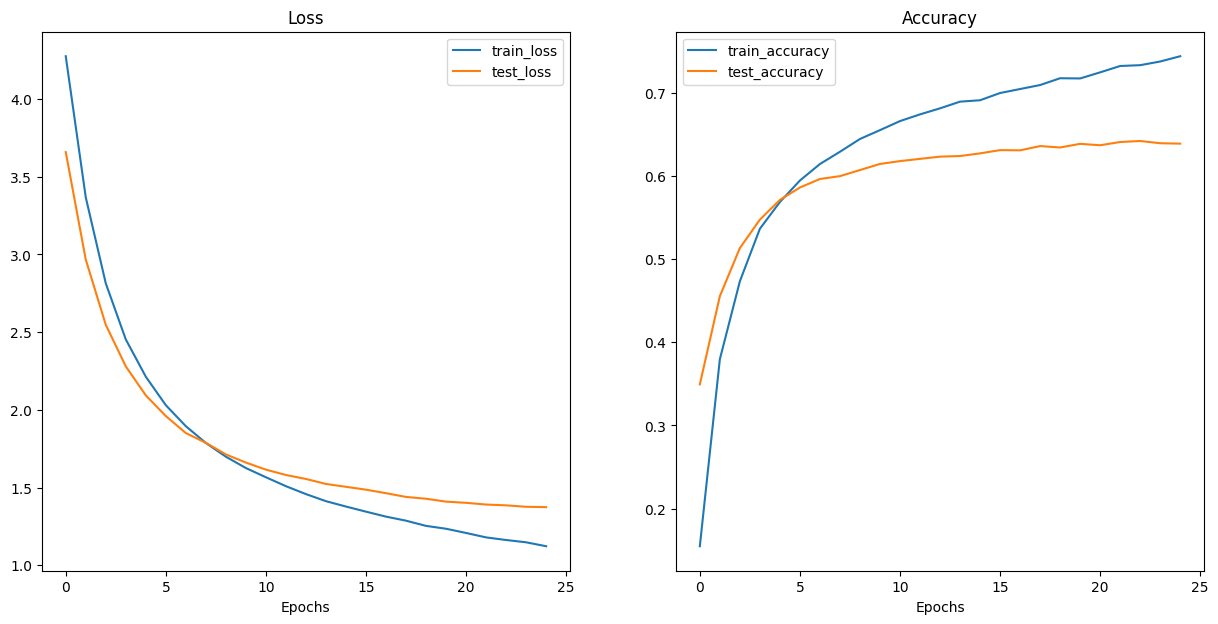

In [ ]:
plot_loss_curves(results)

In [ ]:
len(class_names)

120

### 09. Intiating Updated model Strcture and load saved model.

In [ ]:
OUT_FEATURES = len(class_names)
load_model = create_Mobilenet_v3(OUT_FEATURES= OUT_FEATURES)#mobilenet_v3s#torchvision.models.mobilenet_v3_small(num_classes = 120)#

PATH = '/content/saved_models2/model_checkpoint_epoch_25.pth'

load_model.load_state_dict(torch.load(PATH))


[INFO] Created new mobilenet_v3s model.


<All keys matched successfully>

In [ ]:
device = next(load_model.parameters()).device
device

device(type='cuda', index=0)

In [ ]:
loaded_model_params = sum(torch.numel(param) for param in load_model.parameters())
loaded_model_params

1640856

In [ ]:
param_size = 0
for param in load_model.parameters():
  #print(param.nelement(), param.element_size())
  param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in load_model.buffers():
  buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 6.306MB


In [ ]:
summary(model=load_model,
       input_size=(64, 3, 224, 224),
       col_names=["input_size","output_size","trainable", 'num_params'],
       row_settings=["var_names"],
       col_width=10)

Layer (type (var_name))                                      Input Shape Output Shape Trainable  Param #
MobileNetV3 (MobileNetV3)                                    [64, 3, 224, 224] [64, 120]  Partial    --
├─Sequential (features)                                      [64, 3, 224, 224] [64, 576, 7, 7] False      --
│    └─Conv2dNormActivation (0)                              [64, 3, 224, 224] [64, 16, 112, 112] False      --
│    │    └─Conv2d (0)                                       [64, 3, 224, 224] [64, 16, 112, 112] False      (432)
│    │    └─BatchNorm2d (1)                                  [64, 16, 112, 112] [64, 16, 112, 112] False      (32)
│    │    └─Hardswish (2)                                    [64, 16, 112, 112] [64, 16, 112, 112] --         --
│    └─InvertedResidual (1)                                  [64, 16, 112, 112] [64, 16, 56, 56] False      --
│    │    └─Sequential (block)                               [64, 16, 112, 112] [64, 16, 56, 56] False      (744)
│ 

### 10.Do Predictions and plotting predicted images.

In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        transform: torchvision.transforms,
                        device: torch.device=device):

    img = Image.open(image_path)

    image_transform = transform

    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

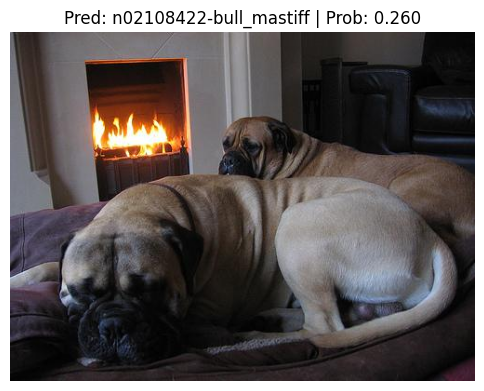

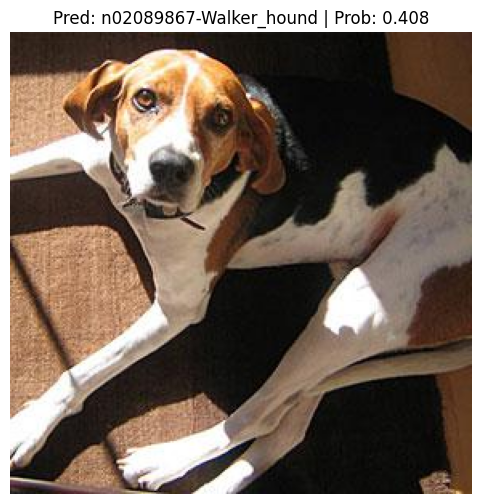

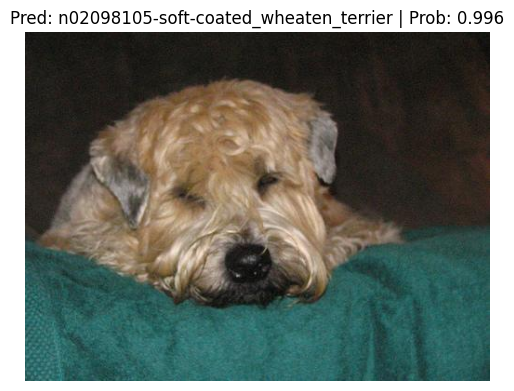

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=load_model,
                        image_path=image_path,
                        class_names=class_names,
                        transform=transform)

### 11.Evaluation on Test data

In [ ]:
from PIL import Image
# Calculate accuracy (a classification metric)
from sklearn import metrics

def model_eval(model: torchvision.models, eval_dataloader, device: device):
    #print(Image)
    model.to(device)
    model.eval()
    with torch.inference_mode():
        correct = 0
        loss = 0
        true_labels = []
        pred_labels = []
        for i, (image, label) in enumerate(eval_dataloader):

          X, y = image.to(device), label.to(device)

          y_pred = model(X)

          loss += loss_fn(y_pred, y)

          y_probs = torch.softmax(y_pred, dim=1)

          pred_class = torch.argmax(y_probs, dim=1)

          correct += (pred_class == y).sum().item()/len(y_pred)

          true_labels.extend(y.tolist())
          pred_labels.extend(pred_class.tolist())

        #print(i, "--",correct)
        loss = loss/len(eval_dataloader)
        acc = correct/ len(eval_dataloader)
        sklearn_acc = metrics.accuracy_score(true_labels, pred_labels)
        classification_report = metrics.classification_report(true_labels, pred_labels)
        confusion_matrics = metrics.confusion_matrix(true_labels, pred_labels)


    return acc, loss, sklearn_acc, len(true_labels), len(pred_labels), classification_report, confusion_matrics

In [ ]:
acc, loss, sklearn_acc, true_labels, pred_labels, classification_report, confusion_matrics  = model_eval(load_model, test_dataloader, device=device )
print(f'Torch acc:{acc:.3f}, loss :{loss:.3f}, Sklearn acc:{sklearn_acc:.3f}, len of true labels: {true_labels}, len of pred labels:{pred_labels}\nclassification report:{classification_report}\nConfusion_matrix:{confusion_matrics}')

Torch acc:0.630, loss :1.403, Sklearn acc:0.629, len of true labels: 1114, len of pred labels:1114
classification report:              precision    recall  f1-score   support

           0       0.20      0.12      0.15         8
           1       0.80      0.80      0.80        10
           2       0.64      0.69      0.67        13
           3       1.00      0.56      0.71         9
           4       0.43      0.25      0.32        12
           5       0.75      0.60      0.67        10
           6       1.00      0.80      0.89        10
           7       0.44      0.44      0.44         9
           8       0.20      0.22      0.21         9
           9       0.67      0.77      0.71        13
          10       0.64      0.78      0.70         9
          11       0.57      0.80      0.67        10
          12       0.60      0.60      0.60        10
          13       0.78      0.78      0.78         9
          14       0.86      0.67      0.75         9
          15  

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

classes = class_names
df_cfm = pd.DataFrame(confusion_matrics, index = classes, columns = classes)
plt.figure(figsize = (100,100))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("mobilenet_v3s_cm.png")

## Classification Complted.